Review and Replication Report for Arrizabalaga et al (2020)
===========================

* Submitted article: https://doi.org/10.12688/f1000research.24136.1)
* Data Source: https://doi.org/10.5281/zenodo.3826038

General Observations
-------------------------

The paper addresses an important issue on a dynamic and moving subject, the availability of research on COVID-19 within the context of the pandemic. This is a useful and potentially important record of the state of the literature at a particular point in time. It's timeliness is also related to some of its weaknesses in terms of the how the state of the relevant literature is changing. Nonetheless it presents a useful record and, with some relatively minor alterations, will provide an important record of a moment in time.

### Recommendations for clarification

There are a series of changes and clarifications I would recommend to the paper as the conclusions depend on the specificity of categories of open access referred to. It is important to be clear about the details of what is meant by categories such as 'hybrid' and 'bronze' and how closely these relate to the heuristics that are used to detect them, which are necessarily imperfect.

Specifically it is important to distinguish between the category of articles that are temporarily released by publishers from behind a paywall, and those articles that are detected by a process of identifying free copies on a publisher website without an explicit license ('bronze'). As the argument of the paper hinges on the identification and categorisation of these articles and implicitly on the motivations of publishers in releasing them it is critically important that the category of access models (promotional or emergency release) is distinguished from the categories that can be detected ('bronze').

Specific suggested changes to address this and related issues:

1. Under 'Data analysis' it is not immediately clear to me why the Web of Science classification is referred to. I would argue that what should be presented is the detailed implementation of exactly how the categories are assigned in this article (see Replication report below for an example of this). If the categories provided by Unpaywall are used directly this should be explained.
2. More detail on the process of data preparation would be helpful. The provision of the finalised data is very useful but details of how the Unpaywall data was collected (via the API in OpenRefine or by upload of a set of DOIs?) and exactly when (because this makes a difference to analysis, see below).
3. Throughout the discussion there is a potential for confusion with terms like 'non-licensed Bronze'. I would use 'Bronze' throughout, perhaps repeating the point that it is by definition non-licensed. Similarly the statement '...many of these Bronze OA publications have been published in Hybrid journals...' is confusing as by the definitions used here Bronze will always be in a hybrid journal.
4. A related issues is that I would prefer to explicitly use a term like 'DOAJ Gold' to refer to articles in purely open access journals as there is significant variation across the literature in the application of this term and being explicit throughout would help.

There is also some confusion in the description of Green OA. Specifically the definition of Green adopted here is one which applies only to those articles that are not also Gold. This is standard practice, although I personally think it inadvisable, but here it leads to significant confusion. In fact the contribution of repository access to this corpus is nearly as great as that of publishers with 43% being described as "shadowed green". I would argue for a more detailed analysis of the repositories being used in the results section.

In policy and analysis terms this is arguably as important a contribution to access as that of publishers. I would argue for a greater analysis of this part of the corpus (see replication report for further details). The choice of Pubmed Central to accept the deposit of articles with no guarantee of long-term access is a significant potential issue. This both raises questions about definitions of "green" open access and licensing that deserve a little more attention in the discussion in my view. 

The paragraph in the discussion that commences "In line with this..." is difficult to parse. It is not clear to me that the lack of a license on the publisher site (which results in a categorisation as bronze) necessarily flows through to the licensing of the Pubmed Central version. This deserves further analysis (see below). The paragraph reads as though the assignment of only 3% to green implies that the repository copies are not guaranteed. My reading of the methodology does not agree with this. This strengthens the argument for an explicit description of the category assignment.

Finally I think the conclusion is probably too strong on what the analysis demonstrates vs what the concerns of the authors are. While I agree with their conclusion that it is unfortunate that the release of otherwise restricted content in the context of the pandemic has such limitations in terms of time frame and re-use this analysis cannot show the downstream effects of those restrictions, which will need to await future analysis. I think a sharper distinction between the observations made and the concerns of the authors would benefit the article.

### Minor issues

Figure 1 has a number of misleading characteristics. In Figure 1a a bar chart is presented that shows both *all* articles and the oa subset but adding the two together. Figure 1c is also confusing. As noted below I don't understand why the data has been divided up the way it has. Both the conflation of the two evidence types for which Unpaywall found free articles, combined with leaving out of DOAJ as evidence source for the second pie chart seem odd and these results are not used elsewhere in the paper. I would leave 1c out and use a venn diagram for 1a and a bar chart for 1b

Figure 2 and related text. The license category of 'cc' is presumably cc0.

I find Figure 4d confusing. Would it not be better to show some quantitative parameter for each of the publishers rather than the -OPEN and +OPEN? Perhaps open licences as a proportion of all articles or something similar?

In analysing past outbreaks the issue of increases in repository-mediated (green) OA over time should be explicitly mentioned. This might particularly be included in a comparison of those repositories that are contributing to access. This does not directly affect the conclusions of these sections as the proportion of green is not otherwise interpreted but the potential for confusion means this should be at least mentioned with a statement saying that it is not therefore possible to directly compare the levels of green open access across these outbreaks.

Replication Report
----------------------

I report on a direct replication using the supplied data. There seems little value in reproducing the Unpaywall data from the supplied DOIs. A manual search of pubmed can be used to confirm the numbers and identity of DOIs and I do not conduct that here at this point.

#### Issues Identified

##### Minor issues
1. The dataset has 5621 rows of data, not 5611 as specified in the paper
2. There are 4989 oa articles by my analysis, not 4986 as specified in the paper. Comparison to the provided data provides 4991 oa articles, and the difference is explained by the two entries for which the JSON does not parse.
3. Not immediately clear why for Fig 1c the two categories of free article have been combined?
4. Why in Figure 1c are the oa types reported only for those articles where the evidence type is either free article or free pdf? Why are the DOAJ evidence examples not included?
5. Figure 2. Slight variation in the percentages calculated from the dataset.
6. There are slight issues in 4b and 4c with license assignment. 
7. As noted in general comments I would drop Figure 4d as it is confusing and it is not clear to me that it is supported by the data where Wiley does not appear to have many more open licenses than Elsevier.

##### Major Issues
1. The numbers in the paper do not seem to correspond directly to those in the dataset provided
2. It appears the article does not use DOAJ as the criterion for gold but the is_oa_journal field from unpaywall. This explains the variance between my analysis and that in the article for "gold" as defined here (16% vs 19% using the data provided, vs 21.5% given in Figure 1)
3. In Figure 5-7 I think there may be an error in the counting of OA articles, counting all those articles for which there is an 'is oa' entry and not only those where it is set to True

### Direct replication

Data is collected from the Zenodo repository provided and a parallel analysis conducted to check the analysis. This uses no external data.

In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
data_url = "https://zenodo.org/record/3826038/files/Open%20Access%20of%20COVID19%20related%20publications%20in%20the%20first%20quarter%20of%202020%20a%20preliminary%20study%20based%20in%20PubMed.xlsx?download=1"
repdata = pd.read_excel(data_url, sheet_name="SARS CoV-2")

In [3]:
repdata

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,...,PDF,Repository copy,Journal name,year,Publisher,IS OA,Evidence,OA status,Host type,License
0,32060933,2019_nCoV/SARS-CoV-2: rapid classification of ...,"Wassenaar TM, Zou Y.",Lett Appl Microbiol. 2020 May;70(5):342-348. d...,Wassenaar TM,Lett Appl Microbiol,2020,2020/02/16,PMC7165814,NaN,...,https://sfamjournals.onlinelibrary.wiley.com/d...,0.0,Letters in Applied Microbiology,2020.0,Wiley,1.0,open (via page says license),hybrid,publisher,cc-by-nc-nd
1,32231345,Inhibition of SARS-CoV-2 (previously 2019-nCoV...,"Xia S, Liu M, Wang C, Xu W, Lan Q, Feng S, Qi ...",Cell Res. 2020 Apr;30(4):343-355. doi: 10.1038...,Xia S,Cell Res,2020,2020/04/02,PMC7118126,NaN,...,https://www.nature.com/articles/s41422-020-030...,1.0,Cell Research,2020.0,Springer Science and Business Media LLC,1.0,open (via page says license),hybrid,publisher,cc-by
2,32107577,Imaging and clinical features of patients with...,"Xu X, Yu C, Qu J, Zhang L, Jiang S, Huang D, C...",Eur J Nucl Med Mol Imaging. 2020 May;47(5):127...,Xu X,Eur J Nucl Med Mol Imaging,2020,2020/02/29,PMC7080117,NaN,...,https://link.springer.com/content/pdf/10.1007/...,1.0,European Journal of Nuclear Medicine and Molec...,2020.0,Springer Science and Business Media LLC,1.0,open (via free pdf),bronze,publisher,NaN
3,32056249,Overlapping and discrete aspects of the pathol...,"Liu J, Zheng X, Tong Q, Li W, Wang B, Sutter K...",J Med Virol. 2020 May;92(5):491-494. doi: 10.1...,Liu J,J Med Virol,2020,2020/02/15,PMC7166760,NaN,...,https://onlinelibrary.wiley.com/doi/pdfdirect/...,0.0,Journal of Medical Virology,2020.0,Wiley,1.0,open (via free article),bronze,publisher,NaN
4,32109444,Coronavirus 2019-nCoV: A brief perspective fro...,"Han Q, Lin Q, Jin S, You L.",J Infect. 2020 Apr;80(4):373-377. doi: 10.1016...,Han Q,J Infect,2020,2020/02/29,PMC7102581,NaN,...,http://www.journalofinfection.com/article/S016...,1.0,Journal of Infection,2020.0,Elsevier BV,1.0,open (via free pdf),bronze,publisher,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,32247327,COVID-19: the current situation in Afghanistan,"Shah J, Karimzadeh S, Al-Ahdal TMA, Mousavi SH...",Lancet Glob Health. 2020 Apr 2:S2214-109X(20)3...,Shah J,Lancet Glob Health,2020,2020/04/06,NaN,NaN,...,https://doi.org/10.1016/s2214-109x(20)30124-8,0.0,The Lancet Global Health,2020.0,Elsevier BV,1.0,open (via free pdf),gold,publisher,NaN
5617,32246515,Ethics and Economic Growth in the Age of COVID...,Hilsenrath PE.,J Rural Health. 2020 Apr 3. doi: 10.1111/jrh.1...,Hilsenrath PE,J Rural Health,2020,2020/04/05,NaN,NaN,...,https://onlinelibrary.wiley.com/doi/pdfdirect/...,0.0,The Journal of Rural Health,2020.0,Wiley,1.0,open (via free article),bronze,publisher,NaN
5618,32246142,Care for the psychological status of frontline...,"Huang J, Liu F, Teng Z, Chen J, Zhao J, Wang X...",Clin Infect Dis. 2020 Apr 3:ciaa385. doi: 10.1...,Huang J,Clin Infect Dis,2020,2020/04/05,NaN,NaN,...,https://academic.oup.com/cid/article-pdf/doi/1...,0.0,Clinical Infectious Diseases,2020.0,Oxford University Press (OUP),1.0,open (via free pdf),bronze,publisher,NaN
5619,32242236,COVID-19 and smoking,"Berlin I, Thomas D, Le Faou AL, Cornuz J.",Nicotine Tob Res. 2020 Apr 3:ntaa059. doi: 10....,Berlin I,Nicotine Tob Res,2020,2020/04/04,NaN,NaN,...,https://academic.oup.com/ntr/article-pdf/doi/1...,0.0,Nicotine & Tobacco Research,2020.0,Oxford University Press (OUP),1.0,open (via free pdf),bronze,publisher,NaN


#### Explicitly define the means by which the categories are assigned in code

These functions are intended to act on a single unpaywall data line and return True or False. They will be applied using the pandas DataFrame.apply function to the OADOI element in the dataframe which is currently a text JSON element which needs to be converted to a python`dict` for analysis. Two records (lines 2917 and 3719 in the spreadsheet, offset by two here in terms of the index) have malformed JSON in the provided dataset so these are dropped via the parse function.

In [4]:
for i,j in enumerate(repdata['OADOI'].values):
    try:
        json.loads(j)
    except:
        print(i)

2915
3717


In [5]:
def parse(j):
    try:
        return json.loads(j)
    except:
        return {}

def is_oa(j):
    """Return True if is_oa flag is True"""
    up = parse(j)
    return up.get('is_oa')
    
def is_gold_doaj(j):
    """Return True if journal_is_in_doaj is True"""
    up = parse(j)
    return up.get('journal_is_in_doaj')

def is_oa_journal(j):
    """Return True if journal_is_oa is True"""
    up = parse(j)
    return up.get('journal_is_oa')

def best_oa_publisher(j):
    up = parse(j)
    best_oa_location = up.get('best_oa_location')
    if best_oa_location:
        return best_oa_location.get('host_type') == 'publisher'
    else:
        return False

def best_oa_licensed(j):
    """Return True if best_oa_location.license is not None"""
    up = parse(j)
    best_oa_location = up.get('best_oa_location')
    if best_oa_location:
        return best_oa_location.get('license') is not None
    else:
        return False

def license(j):
    """Return the license text"""
    up = parse(j)
    best_oa_location = up.get('best_oa_location')
    if best_oa_location:
        return best_oa_location.get('license')
    else:
        return None
    
def is_hybrid(j):
    """Return True is journal_is_in_doaj is False and best_oa_location.license is not None"""
    return (not is_gold_doaj(j)) and best_oa_publisher(j) and best_oa_licensed(j)

def is_bronze(j):
    """Return True is journal_is_in_doaj is False and best_oa_location.license is None"""
    return (not is_gold_doaj(j)) and best_oa_publisher(j) and (not best_oa_licensed(j))

def is_green_only(j):
    """Return True if the best_oa_location is a repository"""
    up = parse(j)
    best_oa_location = up.get('best_oa_location')
    if best_oa_location:
        return best_oa_location.get('host_type') == 'repository'
    else:
        return False
    
def is_green(j):
    """Returns True if any oa_location.host_type is 'repository'
    
    There is a potential edge case that has come up in some cases where the is_oa flag for
    the unpaywall entry is set to False despite their being an oa_location.
    """
    up = parse(j)
    if up.get('oa_locations'):
        host_types = [location.get('host_type') for location in up.get('oa_locations')]
        return 'repository' in host_types
    else:
        return False
    
def is_in_pmc(j):
    """Return True if the ncbi url is in the url element of an oa_location element"""
    up = parse(j)
    if up.get('oa_locations'):
        urls = [location.get('url').split('/')[2] for location in up.get('oa_locations')]
        return 'www.ncbi.nlm.nih.gov' in urls
    else:
        return False

#### Apply the definitions to the existing data table

In [6]:
repdata['is_oa'] = repdata['OADOI'].apply(is_oa)
repdata['is_gold_doaj'] = repdata['OADOI'].apply(is_gold_doaj)
repdata['is_oa_journal'] = repdata['OADOI'].apply(is_oa_journal)
repdata['best_oa_publisher'] = repdata['OADOI'].apply(best_oa_publisher)
repdata['license'] = repdata['OADOI'].apply(license)
repdata['is_hybrid'] = repdata['OADOI'].apply(is_hybrid)
repdata['is_bronze'] = repdata['OADOI'].apply(is_bronze)
repdata['is_green_only'] = repdata['OADOI'].apply(is_green_only)
repdata['is_green'] = repdata['OADOI'].apply(is_green)
repdata['is_in_pmc'] = repdata['OADOI'].apply(is_in_pmc)

#### Getting some basic numbers

In [7]:
print('Number of records:', len(repdata))
print('Number of oa articles:', len(repdata[repdata.is_oa==True]))
print('Number of bronze articles:', len(repdata[repdata.is_bronze==True]))
print('% of bronze articles:', np.round(len(repdata[repdata.is_bronze==True]) / len(repdata) * 100, 1))
print('Number of gold (DOAJ) articles:', len(repdata[repdata.is_gold_doaj==True]))
print('% of gold (DOAJ) articles:', np.round(len(repdata[repdata.is_gold_doaj==True]) / len(repdata) * 100, 1))
print('Number of green only articles:', len(repdata[repdata.is_green_only==True]))
print('% of green only articles:', np.round(len(repdata[repdata.is_green_only==True]) / len(repdata) * 10, 1))
print('Number of hybrid articles:', len(repdata[repdata.is_hybrid==True]))
print('% of hybrid articles:', np.round(len(repdata[repdata.is_hybrid==True]) / len(repdata) * 100, 1))

Number of records: 5621
Number of oa articles: 4989
Number of bronze articles: 3492
% of bronze articles: 62.1
Number of gold (DOAJ) articles: 933
% of gold (DOAJ) articles: 16.6
Number of green only articles: 165
% of green only articles: 0.3
Number of hybrid articles: 399
% of hybrid articles: 7.1


#### Compare my numbers to those from the categorisation provided in the article data

In [8]:
print('Number of records:', len(repdata))
print('Number of oa articles:', len(repdata[repdata['OA status']!='closed']))
print('Number of bronze articles:', len(repdata[repdata['OA status']=='bronze']))
print('% of bronze articles:', np.round(len(repdata[repdata['OA status']=='bronze']) / len(repdata) * 100, 1))
print('Number of gold articles:', len(repdata[repdata['OA status']=='gold']))
print('% of gold articles:', np.round(len(repdata[repdata['OA status']=='gold']) / len(repdata) * 100, 1))
print('Number of green only articles:', len(repdata[repdata['OA status']=='green']))
print('% of green only articles:', np.round(len(repdata[repdata['OA status']=='green']) / len(repdata) * 100, 1))
print('Number of hybrid articles:', len(repdata[repdata['OA status']=='hybrid']))
print('% of hybrid articles:', np.round(len(repdata[repdata['OA status']=='hybrid']) / len(repdata) * 100, 1))

Number of records: 5621
Number of oa articles: 4991
Number of bronze articles: 3362
% of bronze articles: 59.8
Number of gold articles: 1073
% of gold articles: 19.1
Number of green only articles: 165
% of green only articles: 2.9
Number of hybrid articles: 389
% of hybrid articles: 6.9


#### Identifying the difference in the numbers

The data as provided has a larger number of articles registered as "gold". Examining the entries where the "OA status" column (as provided) and the "is_gold_doaj" column (my analysis) disagree shows that in every case the "is_gold_doaj" field is False but the "is_oa_journal" field is True.

This means that the it appears that the categorisation used in the paper is not exactly as described in the methodology where it defines "Gold, OA journal indexed by the Directory of Open Access Journals (DOAJ)"

This difference in categorisation flows through into the other categories. Of the difference of 140 in the gold category, 130 of those move to the Bronze category and 10 move to the hybrid category. This also raises an issue about the commentary in the paper on DOAJ articles without a license as this is largely not the case, as these are amongst the set assigned to be in OA journals based on independent work by Unpaywall (https://doi.org/10.1101/795310).

In [9]:
repdata[(repdata['OA status']=='gold') & (repdata.is_gold_doaj != True)][['DOI', 'is_gold_doaj', 'is_oa_journal', 'OA status']]

,DOI,is_gold_doaj,is_oa_journal,OA status
36,10.24875/BMHIM.20000039,False,True,gold
51,10.12932/AP-200220-0773,False,True,gold
64,10.1017/S0950268820000424,False,True,gold
84,10.24869/psyd.2020.6,False,True,gold
89,10.7861/clinmed.2019-coron,False,True,gold
...,...,...,...,...
5360,10.15585/mmwr.mm6915e6,False,True,gold
5371,10.15585/mmwr.mm6915e4,False,True,gold
5389,10.15585/mmwr.mm6913e2,False,True,gold
5482,10.15585/mmwr.mm6915e2,False,True,gold


Check that this is the case for all rows in the table i.e. the difference is the same in every case.

In [10]:
False not in [v for v in 
              repdata[(repdata['OA status']=='gold') & (repdata.is_gold_doaj != True)]['is_oa_journal'].values]

True

#### Figure 1c

The data for Fig 1c is in the `evidence` element of the Unpaywall record. This is simply aggregated into a new column by the code below.

The recalculation of the values presented in Fig 1c gives precisely the same results (provided the two categories of open(via free pdf) and open (via free article) are combined.

In [11]:
def evidence(j):
    up = parse(j)
    if up.get('best_oa_location'):
        return up['best_oa_location'].get('evidence')
    else:
        return np.nan
    
repdata['evidence'] = repdata['OADOI'].apply(evidence)

Confirming that all the evidence strings are the same across the dataset between those provided and mine parsed out of the Unpaywall data.

In [12]:
disagree = repdata[repdata.evidence != repdata.Evidence][['evidence', 'Evidence']]
print('All those that disagree have my evidence string as Nan:', False not in [v is np.nan for v in disagree.evidence.values])
print('All those that disagree have original evidence string as Nan:', False not in [v is np.nan for v in disagree.Evidence.values])

All those that disagree have my evidence string as Nan: True
All those that disagree have original evidence string as Nan: True


In [13]:
strings = repdata.evidence.unique()
df=pd.DataFrame(index=strings, columns=['count', 'percent'])
for string in strings:
    count = len(repdata[repdata.evidence==string])
    pc = np.round(count/len(repdata) * 100, 1)
    pc_of_oa = np.round(count / len(repdata[repdata.is_oa==True]) *100, 1)
    df.loc[string, 'count'] = count
    df.loc[string, 'percent'] = pc
    df.loc[string, 'percent_of_oa'] = pc_of_oa

df.sort_values('count', ascending=False)

,count,percent,percent_of_oa
open (via free pdf),2602,46.3,52.2
open (via free article),1080,19.2,21.6
open (via page says license),784,13.9,15.7
oa journal (via doaj),300,5.3,6.0
oa repository (via pmcid lookup),158,2.8,3.2
open (via crossref license),36,0.6,0.7
open (via page says Open Access),22,0.4,0.4
oa repository (via OAI-PMH title and first author match),4,0.1,0.1
oa repository (via OAI-PMH doi match),2,0,0.0
oa repository (via OAI-PMH title and last author match),1,0,0.0


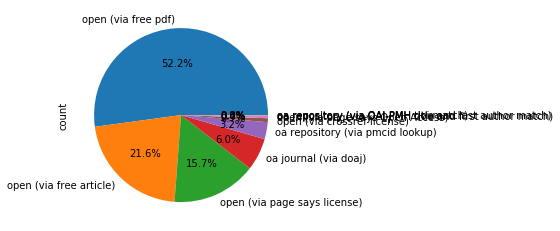

In [14]:
df.sort_values('count', ascending=False).plot.pie(y='count', legend=False, autopct='%1.1f%%')

The exact percentages for Figure 1c can be replicated as below, but I do not understand why the evidence types are restricted to those where unpaywall found either a free pdf or free article, and those where the evidence comes from DOAJ is left out. This would raise the proportion of gold and reduce the proportion of bronze as reported. 

Using my assignment of Gold, Bronze and Hybrid gives slightly different results as would be expected from the above.

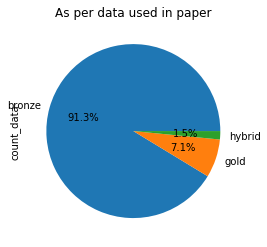

In [15]:
goldish = repdata[repdata.evidence.isin(['open (via free pdf)', 'open (via free article)'])]
types = ['bronze', 'gold', 'hybrid']
funcmap = {'bronze': 'is_bronze',
           'gold': 'is_gold_doaj',
           'hybrid': 'is_hybrid'}
df = pd.DataFrame(index=types, columns=['count_data', 'count_new'])
for t in types:
    count_data = len(goldish[goldish['OA status']==t])
    count_new = len(goldish[goldish[funcmap[t]]==True])
    df.loc[t, 'count_data'] = count_data
    df.loc[t, 'count_new'] = count_new
    
df.sort_values('count_data', ascending=False).plot.pie(y='count_data', legend=False, autopct='%1.1f%%', 
                                                       title='As per data used in paper')

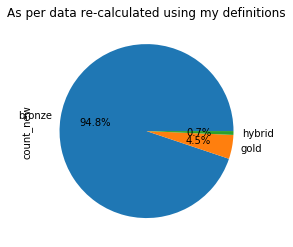

In [16]:
df.sort_values('count_data', ascending=False).plot.pie(y='count_new', legend=False, autopct='%1.1f%%',
                                                       title='As per data re-calculated using my definitions')

For comparison if you use all of those articles which are assigned as delivering OA via a publisher gives a much higher proportion of gold as you would expect given that DOAJ as evidence is included.

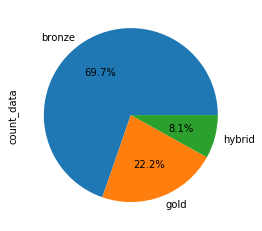

In [17]:
goldish = repdata[repdata.best_oa_publisher==True]
types = ['bronze', 'gold', 'hybrid']
funcmap = {'bronze': 'is_bronze',
           'gold': 'is_gold_doaj',
           'hybrid': 'is_hybrid'}
df = pd.DataFrame(index=types, columns=['count_data', 'count_new'])
for t in types:
    # This uses the columns that were in the original dataset
    count_data = len(goldish[goldish['OA status']==t])
    # This looks up the new columns I have added
    count_new = len(goldish[goldish[funcmap[t]]==True])
    df.loc[t, 'count_data'] = count_data
    df.loc[t, 'count_new'] = count_new
    
df.sort_values('count_data', ascending=False).plot.pie(y='count_data', legend=False, autopct='%1.1f%%')

### Figure 2

In [18]:
licenses = list(repdata.license.unique())
licenses.remove(None)
df=pd.DataFrame(index=licenses.append('none'), columns=['count_data', 'count_new'])
for license in licenses:
    count_data = len(repdata[repdata.License==license])
    count_new = len(repdata[repdata.license==license])
    df.loc[license, 'count_data'] = count_data
    df.loc[license, 'count_new'] = count_new

df.loc['none', 'count_data'] = repdata.License.isnull().sum()
df.loc['none', 'count_new'] = repdata.license.isnull().sum()

In [19]:
df

,count_data,count_new
cc-by-nc-nd,291,291
cc-by,643,643
pd,9,9
cc-by-nc-sa,42,42
cc-by-nc,159,159
cc0,2,2
acs-specific: authorchoice/editors choice usage agreement,3,3
implied-oa,22,22
cc-by-sa,1,1
cc-by-nd,3,3


Calculating the percentages there are differences to the values given in Figure 2 which presumably relate to some of difference in the null values through the table? This doesn't seem to be due to any miscoding as the sum of all the licenses in the table above comes to 5621 articles which is the full dataset. This will flow through to Figure 1b so those numbers will differ slightly as well.

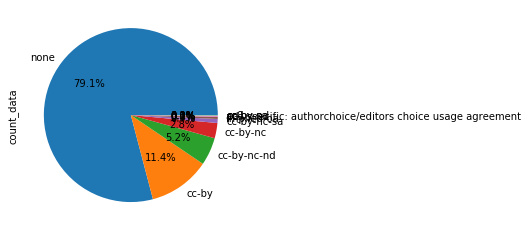

In [20]:
df.sort_values('count_data', ascending=False).plot.pie(y='count_data', legend=False, autopct='%1.1f%%')

In [21]:
df.count_data.sum()

5621

### Figure 3

The numbers provided in Figure 3 can be precisely replicated from the provided data.

In [22]:
gb = repdata.groupby('Publisher')
p = gb.count().sort_values('Title', ascending=False)
p['percent'] = np.round(p['Title'] / p.Title.sum() * 100, 1)
p[['Title', 'percent']][0:7]

,Title,percent
Publisher,,
Elsevier BV,1668,29.7
Wiley,762,13.6
Springer Science and Business Media LLC,608,10.8
BMJ,327,5.8
Oxford University Press (OUP),265,4.7
Ovid Technologies (Wolters Kluwer Health),232,4.1
Cambridge University Press (CUP),112,2.0


In [23]:
gb = repdata.groupby('Journal name')
j = gb.count().sort_values('Title', ascending=False)
j['percent'] = np.round(j['Title'] / j.Title.sum() * 100, 1)
j[['Title', 'percent']][0:7]

,Title,percent
Journal name,,
BMJ,238,4.2
Journal of Medical Virology,174,3.1
The Lancet,127,2.3
New England Journal of Medicine,92,1.6
Journal of Infection,82,1.5
JAMA,78,1.4
Clinical Infectious Diseases,78,1.4


### Figure 4

For Figure 4a the figures are precisely replicated. For 4c there is a slight difference

In [24]:
publishers = p.index.values
for colname in ['oa_count', 'license_count', 'open_license_count']:
    p[colname] = p['Title']

for publisher in publishers:
    oa_count = len(repdata[(repdata.Publisher==publisher) & (repdata.is_oa==True)])
    license_count = repdata[(repdata.Publisher==publisher)].license.isnull().sum()
    open_license_count = len(repdata[(repdata.Publisher==publisher) & 
                                     (repdata.license.isin(['cc0', 'cc-by', 'pd']))])
    p.loc[publisher, 'oa_count'] = oa_count
    p.loc[publisher, 'license_count'] = license_count
    p.loc[publisher, 'open_license_count'] = open_license_count
p['oa_pc'] = np.round(p.oa_count / p.Title * 100, 1)
p['license_pc'] = np.round(p.license_count / p.Title * 100, 1)
p['open_pc'] = np.round(p.open_license_count / p.Title * 100, 1)
p[['Title', 'oa_count', 'oa_pc', 'license_count', 'license_pc', 'open_license_count', 'open_pc']][0:10]

,Title,oa_count,oa_pc,license_count,license_pc,open_license_count,open_pc
Publisher,,,,,,,
Elsevier BV,1668,1606,96.3,1450,86.9,20,1.2
Wiley,762,546,71.7,708,92.9,24,3.1
Springer Science and Business Media LLC,608,570,93.8,470,77.3,125,20.6
BMJ,327,311,95.1,303,92.7,1,0.3
Oxford University Press (OUP),265,201,75.8,233,87.9,12,4.5
Ovid Technologies (Wolters Kluwer Health),232,175,75.4,197,84.9,1,0.4
Cambridge University Press (CUP),112,109,97.3,74,66.1,38,33.9
American Medical Association (AMA),109,106,97.2,102,93.6,7,6.4
Informa UK Limited,99,83,83.8,96,97.0,2,2.0


For Figure 4b, figures are replicated with slight variation due to choices in oa category assignment. It should be made clear whether the percentages given in Figure 4b are of all papers or of the OA papers. There are slight issues in 4b and 4c with license assignment. As noted in general comments I would drop Figure 4d as it is confusing and it is not clear to me that it is supported by the data where Wiley does not appear to have many more open licenses than Elsevier.

In [25]:
publishers = p.index.values
colnames = ['gold_doaj', 'hybrid', 'green_only', 'bronze']
for colname in colnames:
    p[colname] = p['Title']

for publisher in publishers:
    p.loc[publisher, 'green_only'] = len(repdata[(repdata.Publisher==publisher) & (repdata.is_green_only==True)])
    p.loc[publisher, 'hybrid'] = len(repdata[(repdata.Publisher==publisher) & (repdata.is_hybrid==True)])
    p.loc[publisher, 'gold_doaj'] = len(repdata[(repdata.Publisher==publisher) & (repdata.is_gold_doaj==True)])
    p.loc[publisher, 'bronze'] = len(repdata[(repdata.Publisher==publisher) & (repdata.is_bronze==True)])

for colname in colnames:
    p[colname + '_pc'] = np.round(p[colname] / p.oa_count * 100, 1)

p[['Title', 'oa_count', 'gold_doaj_pc', 'hybrid_pc', 'green_only_pc', 'bronze_pc']][0:10]

,Title,oa_count,gold_doaj_pc,hybrid_pc,green_only_pc,bronze_pc
Publisher,,,,,,
Elsevier BV,1668,1606,16.1,3.1,8.1,72.8
Wiley,762,546,4.9,5.1,0.7,89.2
Springer Science and Business Media LLC,608,570,16.5,7.7,1.9,73.9
BMJ,327,311,1.6,6.1,0.0,92.3
Oxford University Press (OUP),265,201,2.0,13.9,1.0,83.1
Ovid Technologies (Wolters Kluwer Health),232,175,12.6,7.4,0.0,80.0
Cambridge University Press (CUP),112,109,0.0,34.9,0.9,64.2
American Medical Association (AMA),109,106,2.8,3.8,0.0,93.4
Informa UK Limited,99,83,37.3,2.4,0.0,60.2


### Figure 5-7

These figures are similar based on the additional sheets in the provided data. The figures will obviously vary, similarly to the above for my variant assignment of categories so here I merely reproduce the figures based on the categories given in the data.

There appears to be an error in the calculation of the number of OA papers in Figures 5-7 where all those entries with an is_oa entry are counted (see 'is oa' column below which just counts entries) vs oa_count which counts only those entires for which the 'is oa' column is True.

I may be misreading how the percentages are calculated but there seem to be some issues with either including or not including the set of articles without DOIs or some aspect of what is included. I think there may be an issue with the construction of the provided dataset which is not consistent across the disease types?

Note for clarity that the percentages in Figures 5-7b seem to be as a proportion of OA not as a proportion of the total.

In [26]:
data_url = "https://zenodo.org/record/3826038/files/Open%20Access%20of%20COVID19%20related%20publications%20in%20the%20first%20quarter%20of%202020%20a%20preliminary%20study%20based%20in%20PubMed.xlsx?download=1"
cov1 = pd.read_excel(data_url, sheet_name="SARS COV 1")
mers = pd.read_excel(data_url, sheet_name="MERS CoV")
glioma = pd.read_excel(data_url, sheet_name="Low Grade Glioma")
ulcer = pd.read_excel(data_url, sheet_name="Peptic Ulcer")

In [27]:
def gb_year_oa(df):
    """Return DataFrame grouped by year with oa percentage calculated"""
    data = df.dropna(subset=['DOI'])
    gb = data.groupby(['Publication Year']).count()
    gboa = data[data['oa status'].isin(['green', 'gold', 'hybrid', 'bronze'])].groupby('Publication Year').count()
    gb['oa_count'] = gboa['Title']
    gb['oa_pc'] = np.round(gb['is oa'] / gb.Title * 100, 1)
    return gb[['Title', 'oa_count', 'is oa', 'oa_pc']]

def gb_type_oa(df, year_range):
    """Return DataFrame grouped by OA type"""
    gb = df[df['Publication Year'].isin(range(*year_range))].groupby(['oa status']).count()
    gb['type_pc'] = np.round(gb['Title'] / (gb['Title'].sum()-gb.loc['closed', 'Title']) * 100, 1)
    return gb[['Title', 'type_pc']]

In [28]:
# Figure 5a
gb_year_oa(cov1)

,Title,oa_count,is oa,oa_pc
Publication Year,,,,
2002,9,8,9,100.0
2003,335,269,335,100.0
2004,584,508,581,99.5
2005,511,422,510,99.8
2006,432,366,432,100.0
2007,49,47,49,100.0


In [29]:
# Figure 5b
gb_type_oa(cov1, (2003,2007))

,Title,type_pc
oa status,,
bronze,988,63.1
closed,293,18.7
gold,218,13.9
green,307,19.6
hybrid,52,3.3


In [30]:
# Figure 6a
gb_year_oa(mers)

,Title,oa_count,is oa,oa_pc
Publication Year,,,,
2012,2,2,2,100.0
2013,120,109,116,96.7
2014,260,246,260,100.0
2015,324,292,322,99.4
2016,347,328,345,99.4
2017,276,266,273,98.9
2018,43,38,43,100.0
2019,1,1,1,100.0


In [31]:
# Figure 6b
gb_type_oa(mers, (2013, 2017))

,Title,type_pc
oa status,,
bronze,421,43.2
closed,68,7.0
gold,432,44.3
green,52,5.3
hybrid,70,7.2


In [32]:
# Figure 7a.1
gb_year_oa(glioma)

,Title,oa_count,is oa,oa_pc
Publication Year,,,,
2017,553,331,538,97.3
2018,571,299,550,96.3
2019,632,308,614,97.2
2020,62,20,62,100.0


In [33]:
# Figure 7a.2
gb_type_oa(glioma, (2017,2020))

,Title,type_pc
oa status,,
bronze,195,20.8
closed,764,81.4
gold,475,50.6
green,161,17.2
hybrid,107,11.4


In [34]:
# Figure 7b.1
gb_year_oa(ulcer)

,Title,oa_count,is oa,oa_pc
Publication Year,,,,
2017,686,335,648,94.5
2018,644,320,613,95.2
2019,605,297,586,96.9
2020,38,11,38,100.0


In [35]:
# Figure 7b.2
gb_type_oa(ulcer, (2017, 2020))

,Title,type_pc
oa status,,
bronze,170,17.9
closed,895,94.0
gold,570,59.9
green,123,12.9
hybrid,89,9.3
